In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


In [2]:
data = pd.read_excel("../input/upc-water/dataset_compiled.xlsx", parse_dates=['Month'])

In [3]:
data.head()

,Month,Temp °C,pH,DO\n(mg/L),BOD\n(mg/L),Total Coli form\n/100ml
0,Jan-12,14.5,6.86,9.6,2.4,200
1,Feb-12,16,7.68,8.8,2.8,280
2,Mar-12,18,7.42,8.4,2.6,350
3,Apr-12,18,8.32,7.4,2.7,220
4,May-12,19,7.84,8,2.2,200


In [4]:
data.tail()

,Month,Temp °C,pH,DO\n(mg/L),BOD\n(mg/L),Total Coli form\n/100ml
97,Feb-20,18,7.6,10.2,<1,80
98,Mar-20,19,7.13,9.8,<1,50
99,Apr-20,19,7.7,9.8,0.8,60
100,May-20,18,7.85,9.6,1,70
101,Jun-20,22,7.58,9.2,1,60


In [5]:
data.columns = ["month", 'temp', 'pH','DO','BOD','coliform']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     102 non-null    object
 1   temp      97 non-null     object
 2   pH        98 non-null     object
 3   DO        98 non-null     object
 4   BOD       98 non-null     object
 5   coliform  98 non-null     object
dtypes: object(6)
memory usage: 4.9+ KB


In [7]:
data.replace(to_replace= "-" ,value = np.NAN, inplace = True)
data.replace(to_replace= "<1" , value = .8 , inplace = True)

In [8]:
data.columns
lis = ['temp', 'pH', 'DO', 'BOD', 'coliform']

In [9]:
for i in lis:
    pd.to_numeric(data[i])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     102 non-null    object 
 1   temp      83 non-null     float64
 2   pH        96 non-null     float64
 3   DO        96 non-null     float64
 4   BOD       96 non-null     float64
 5   coliform  92 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.9+ KB


In [11]:
from datetime import datetime

In [12]:
data['month'].replace(to_replace = "-", value = " ", regex = True, inplace = True)

In [13]:
data['month'] = data['month'].apply(lambda x : datetime.strptime(x, '%b %y'))


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     102 non-null    datetime64[ns]
 1   temp      83 non-null     float64       
 2   pH        96 non-null     float64       
 3   DO        96 non-null     float64       
 4   BOD       96 non-null     float64       
 5   coliform  92 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 4.9 KB


In [15]:
data.describe()

,temp,pH,DO,BOD,coliform
count,83.000000,96.000000,96.000000,96.000000,92.000000
mean,18.654217,7.781667,9.006250,1.348958,105.173913
std,2.594709,0.349754,0.843278,0.694337,74.648570
min,10.000000,6.860000,6.200000,0.800000,22.000000
25%,17.000000,7.510000,8.400000,0.800000,60.000000
50%,19.000000,7.700000,9.000000,1.000000,80.000000
75%,20.000000,8.050000,9.600000,1.800000,115.000000
max,24.000000,8.500000,10.800000,3.400000,500.000000


In [16]:
data.set_index('month', inplace = True)

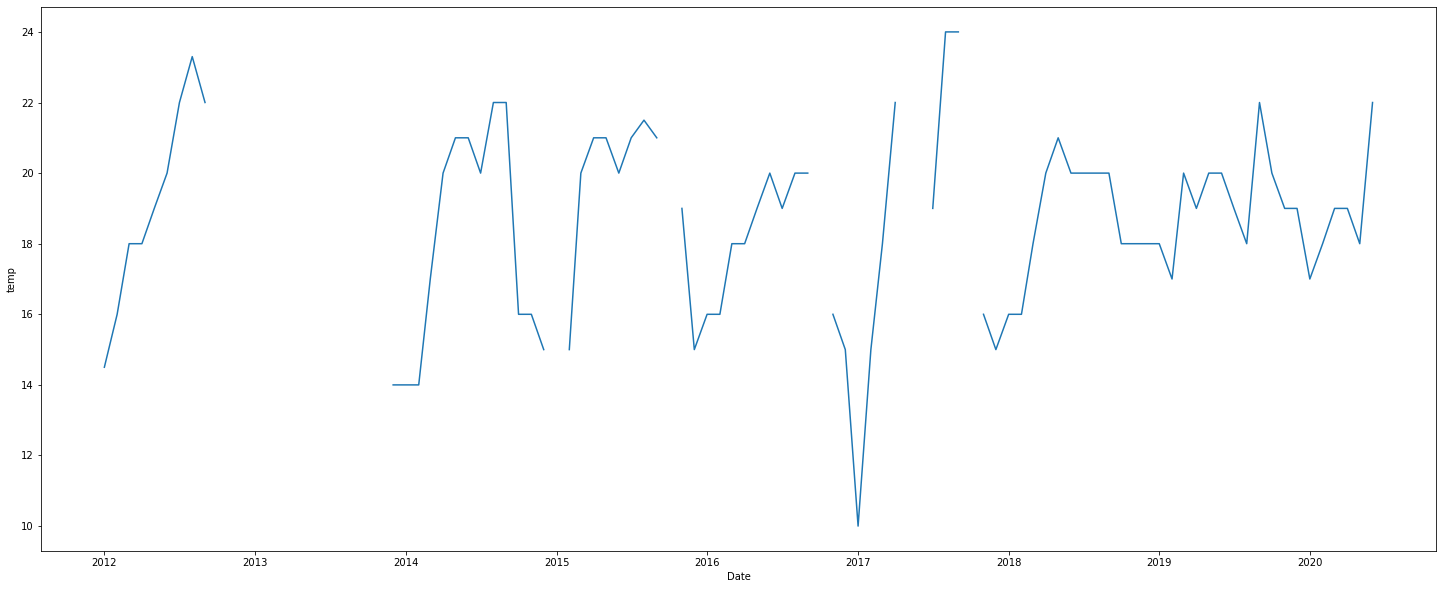

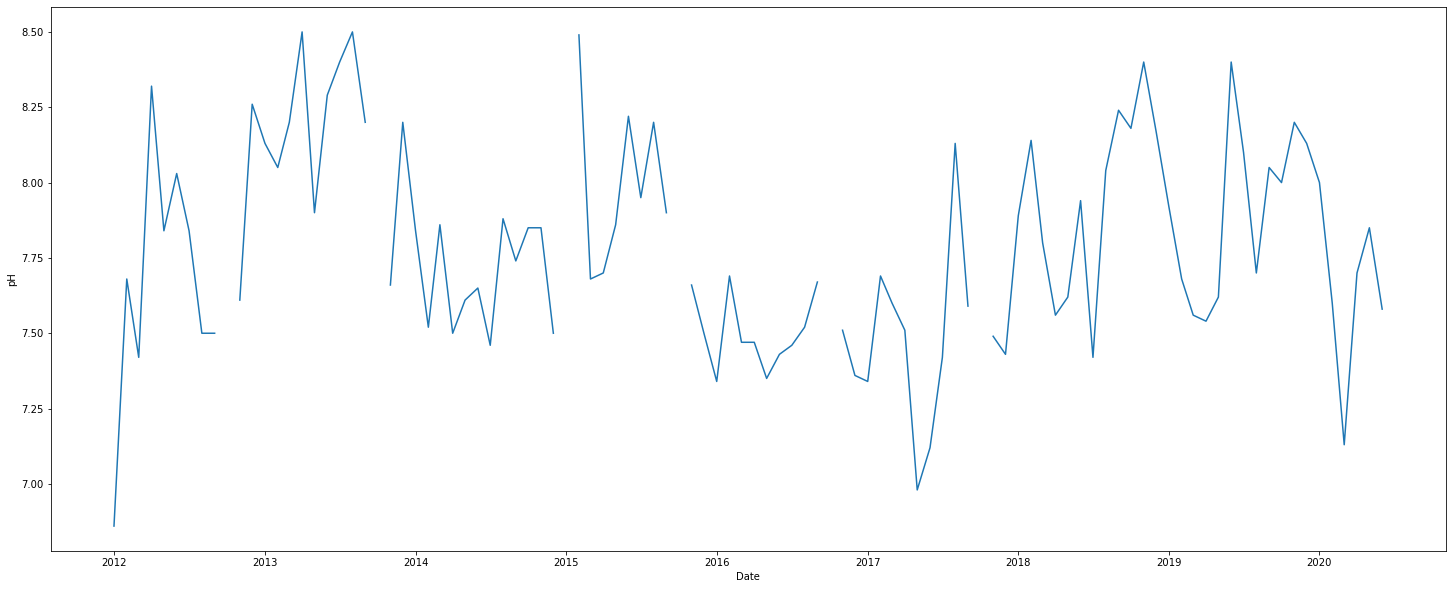

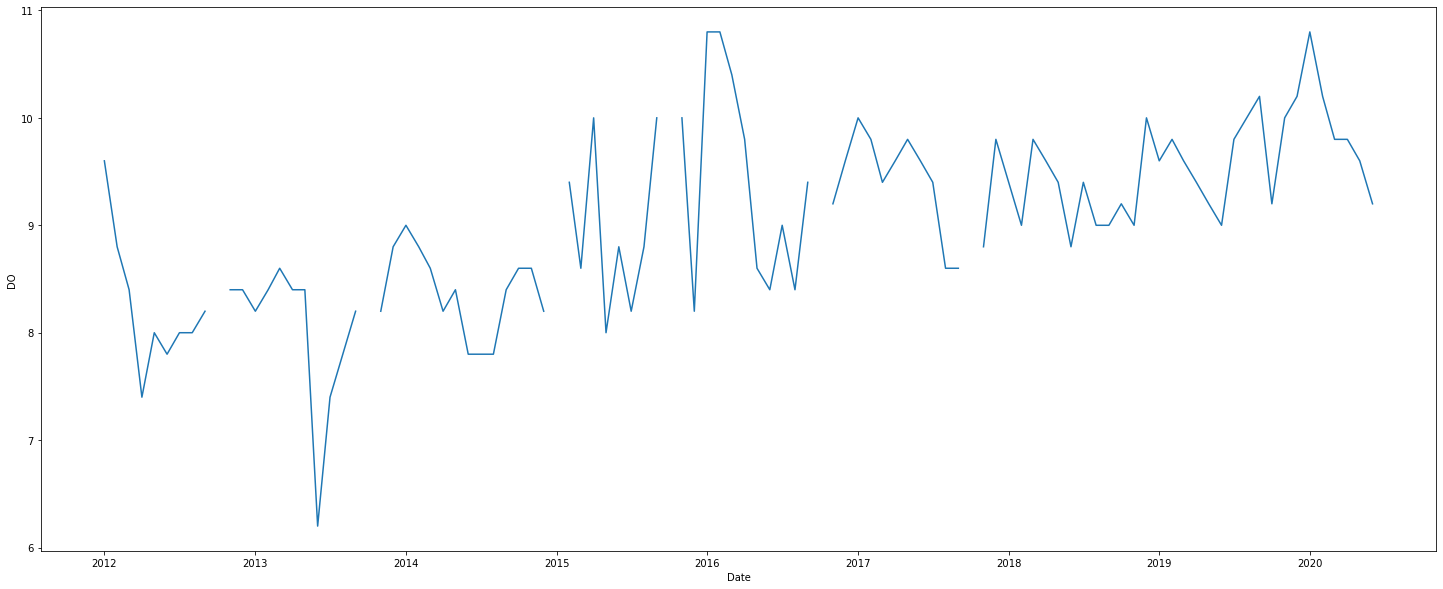

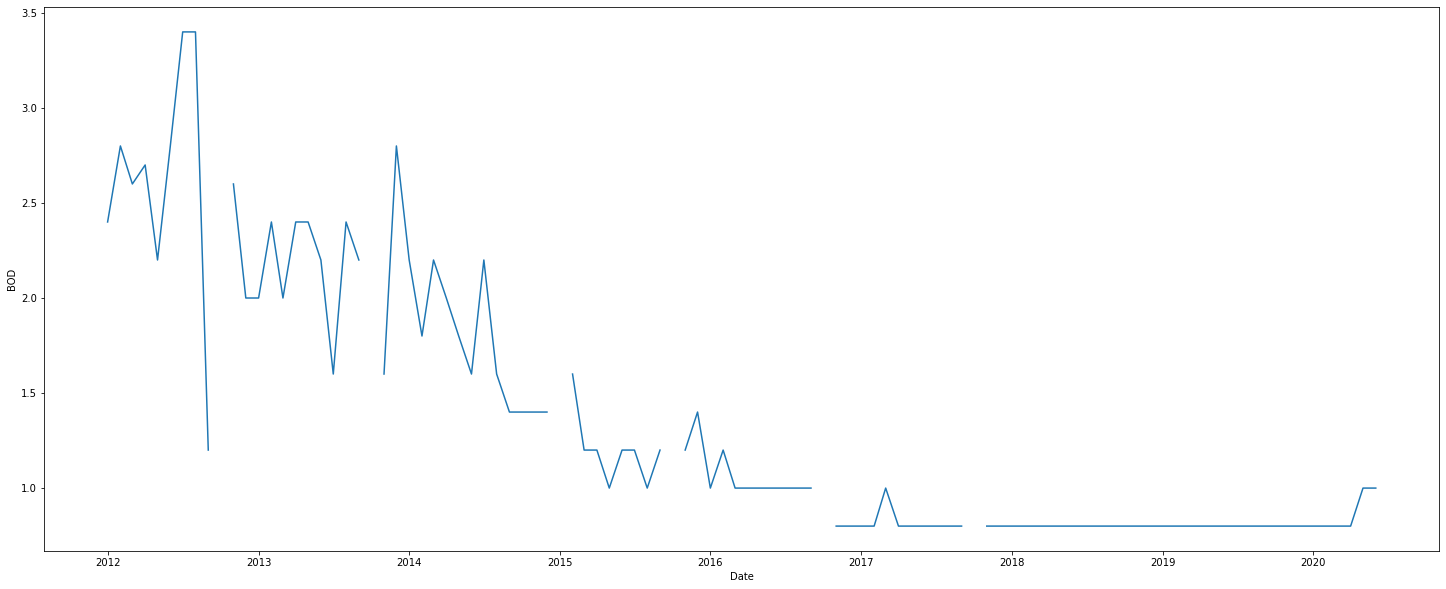

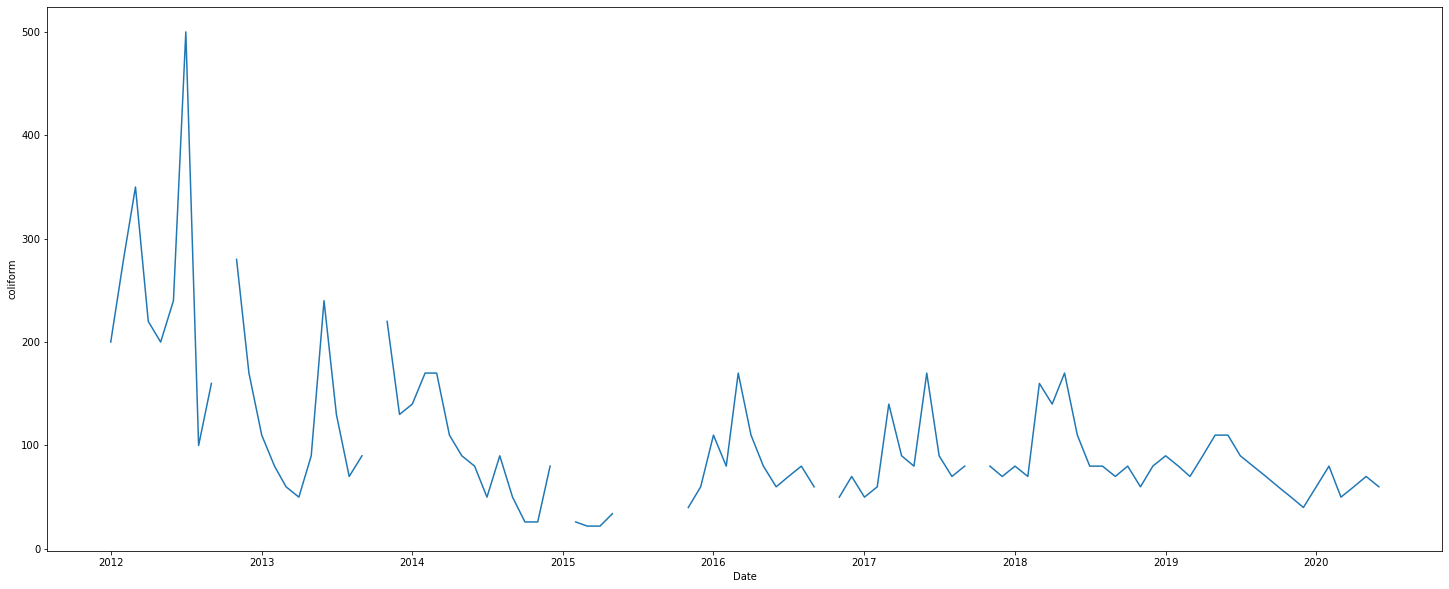

In [17]:
for i in lis:
    plt.figure(figsize=(25, 10))
    plt.plot(data[i])
    plt.ylabel(i)
    plt.xlabel('Date')

Discontinuity is due to missing data fields

In [18]:
dat = (data.isnull().sum()).sort_values(ascending= False)
Missing_Data = pd.DataFrame({'Number of missing values' : dat})
Missing_Data

,Number of missing values
temp,19
coliform,10
BOD,6
DO,6
pH,6


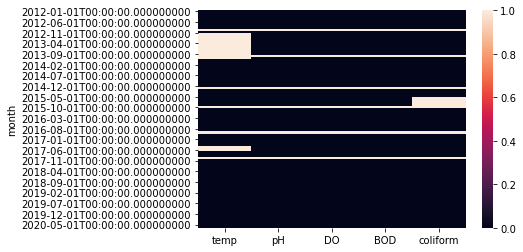

In [19]:
sns.heatmap(data.isnull())

As seen from the heatmap most of the NULL values occur together for all columns, these values can either be deleted entirely or we could use a generalized Last observation carried forward (LOCF) or Next observation carried backward (NOCB) approach

As data seems to have seasonality and trend, therefore imputations cant be made simply by mean/median/mode/linear interpolation methods. Hence, applying seasonal adjustment with linear interpolation to consider trend and seasonality in data

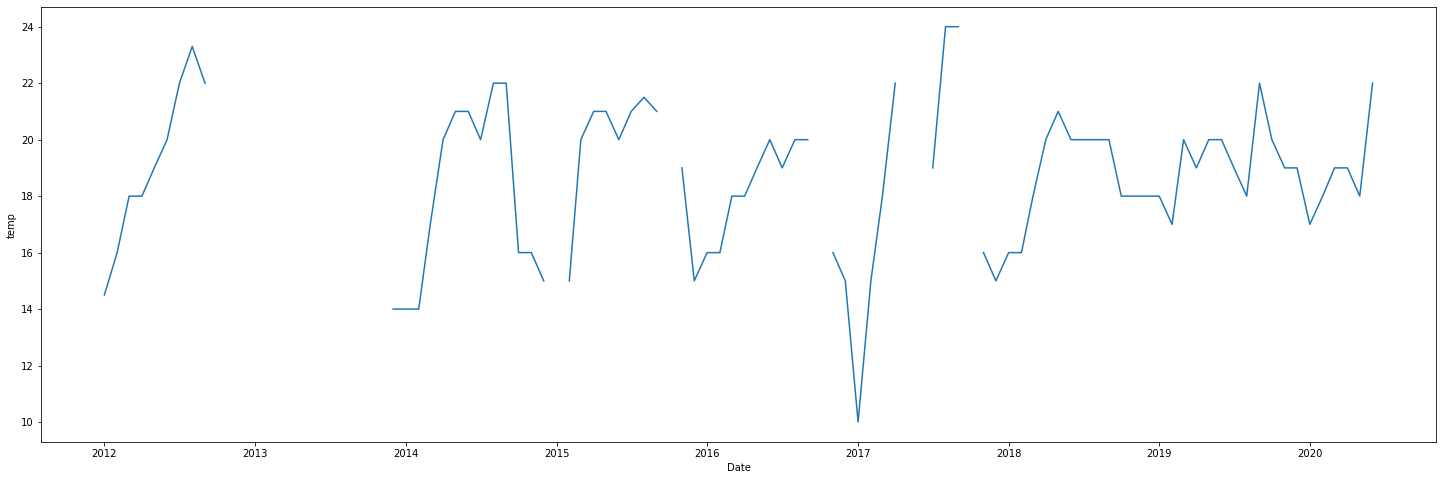

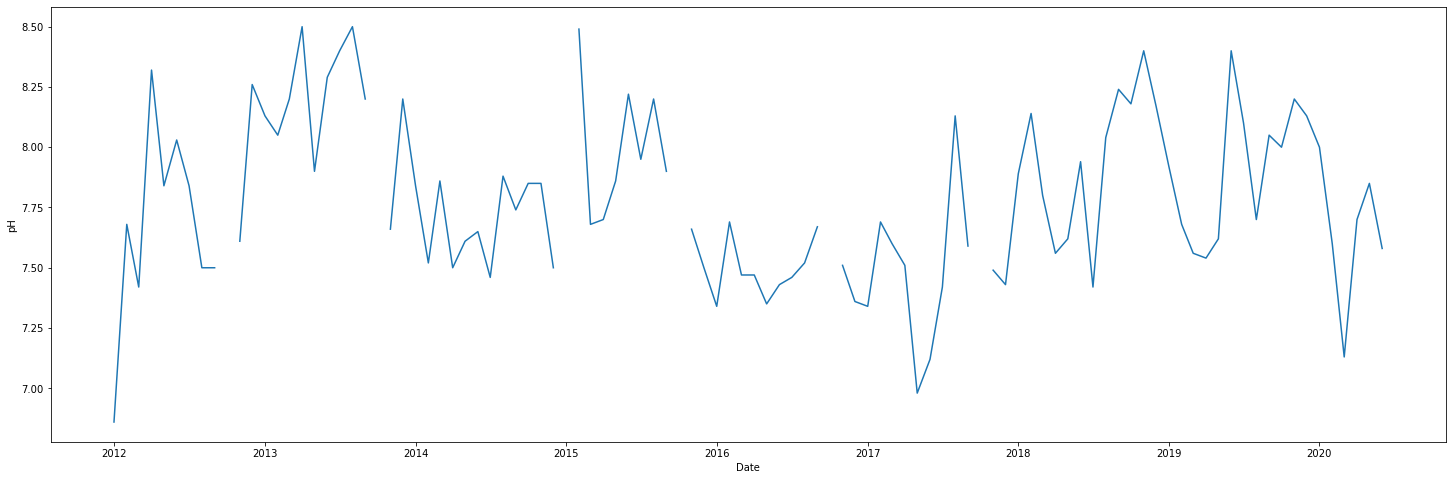

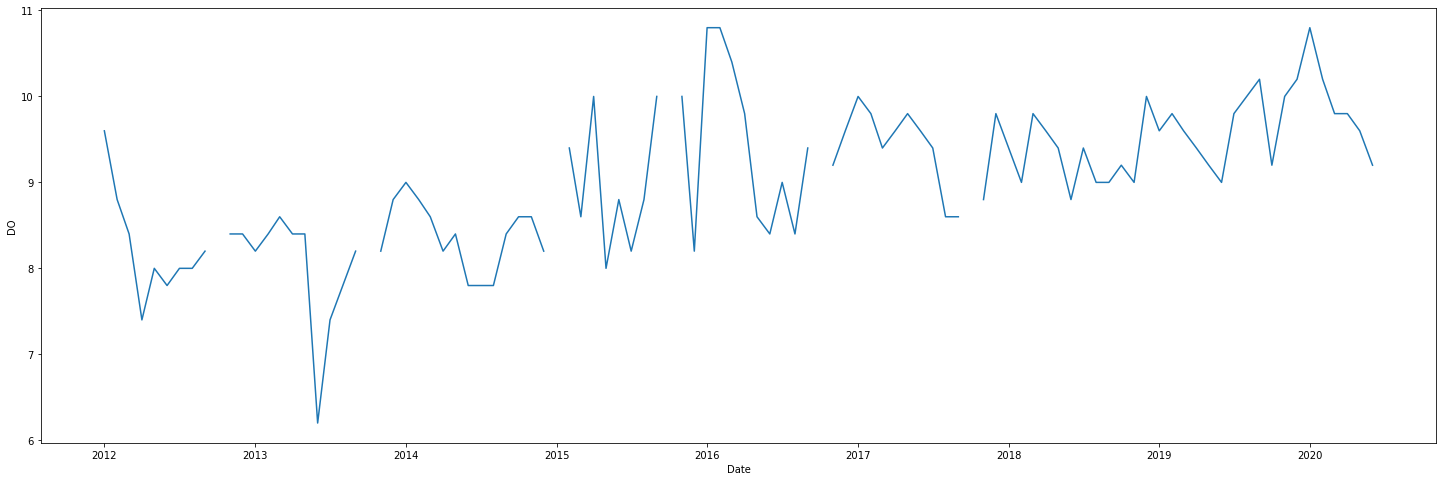

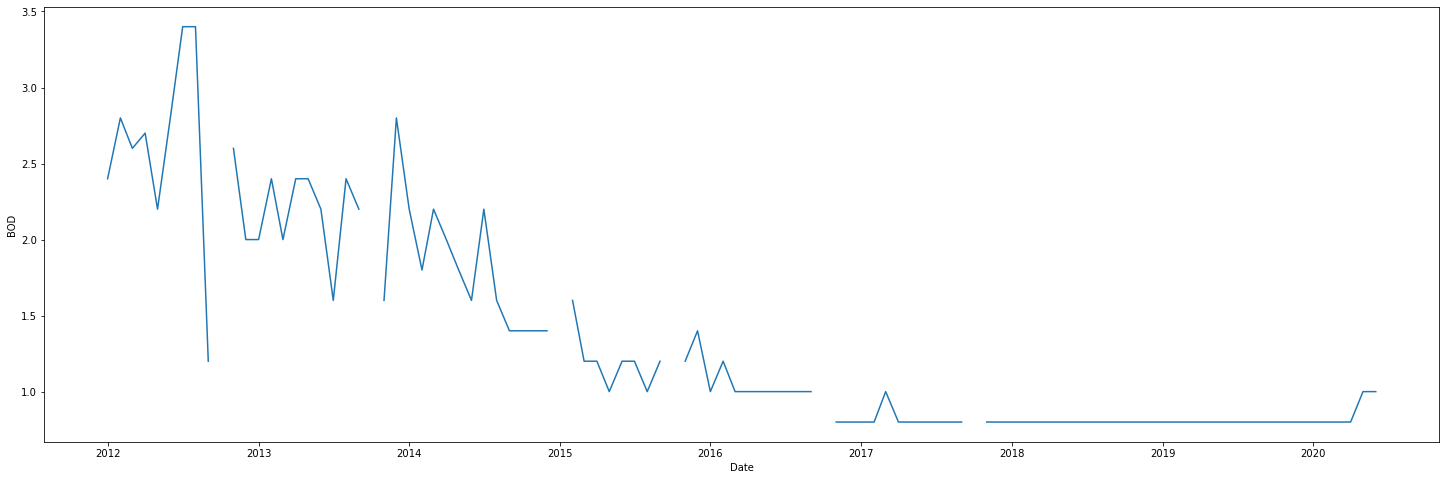

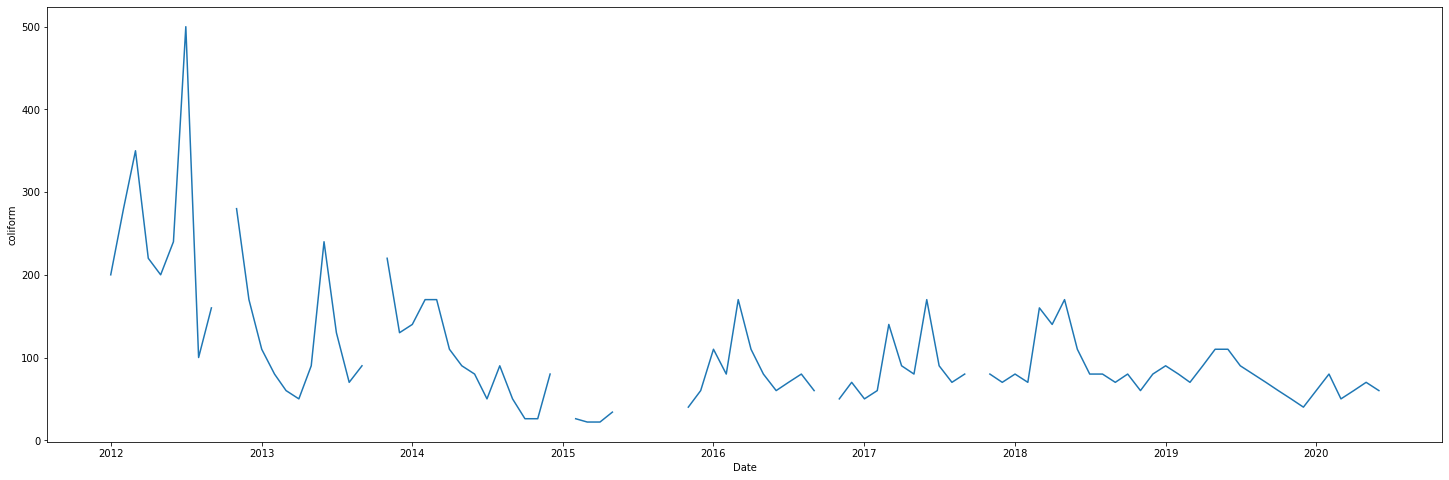

In [20]:
# time interpolation on entire data
data_interpol = data.interpolate(method='time')
for i in lis:
    plt.figure(figsize=(25, 8))
    plt.plot(data[i])
    plt.ylabel(i)
    plt.xlabel('Date')

Values like pH, DO might work better with Forward filling values based on previous values (LOCF)

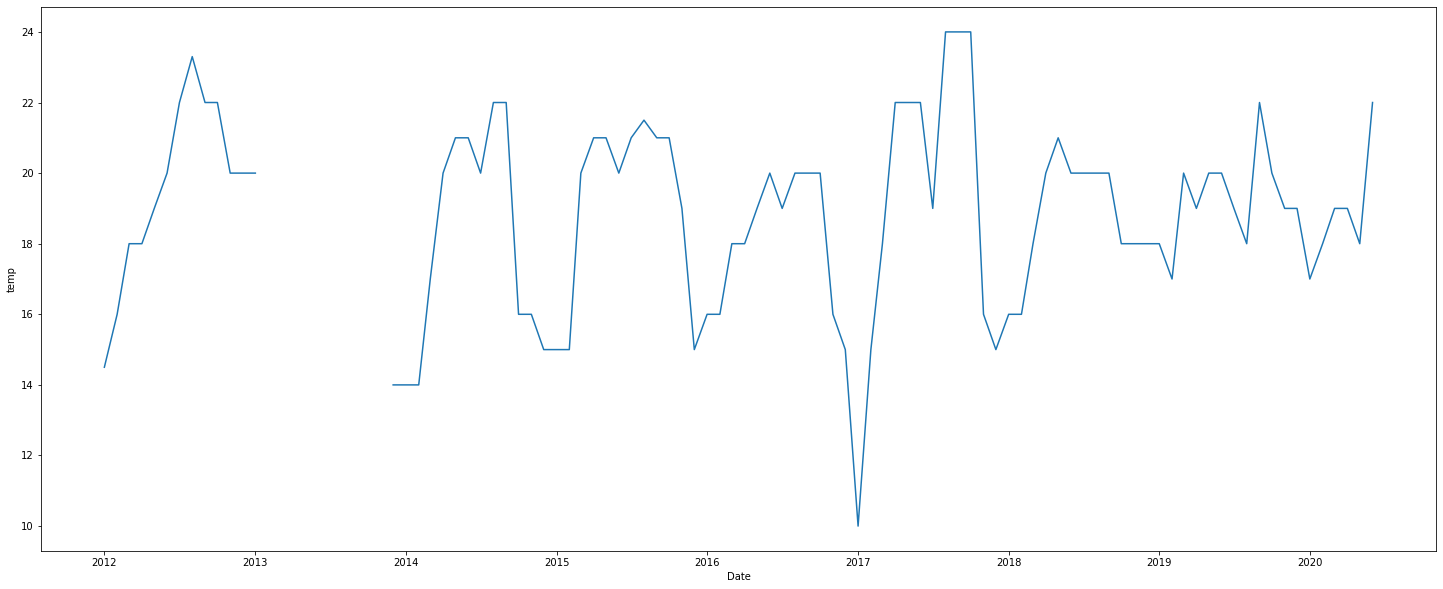

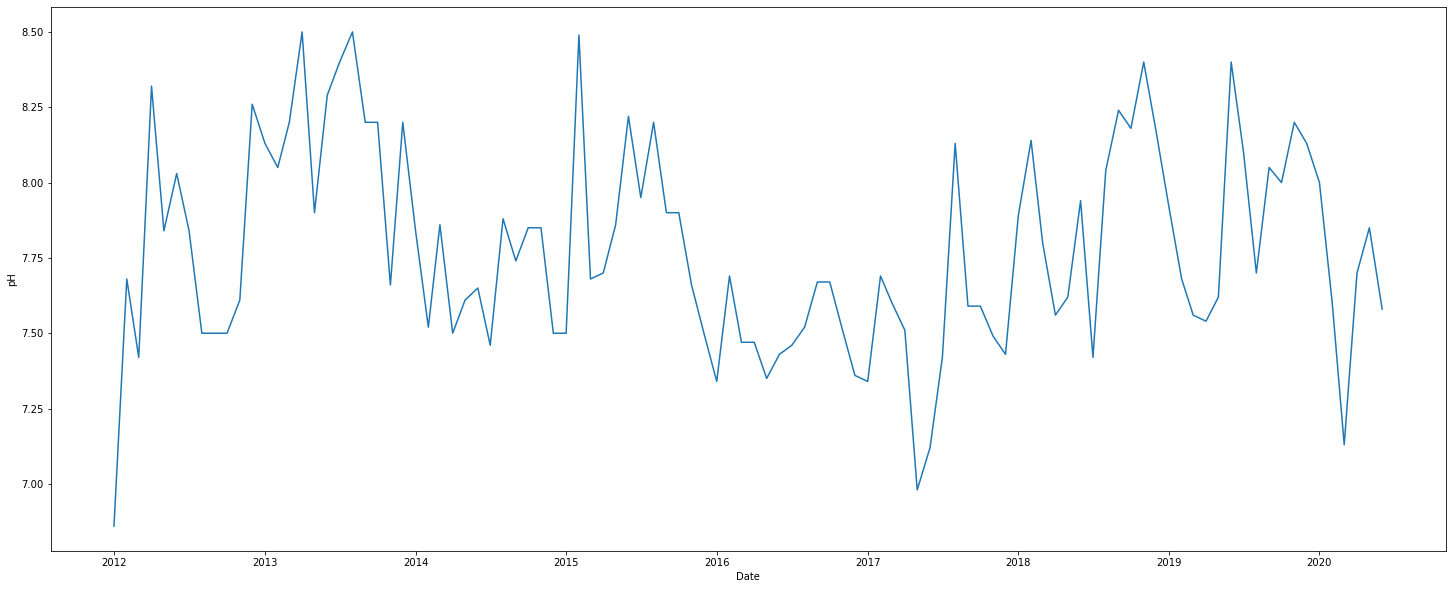

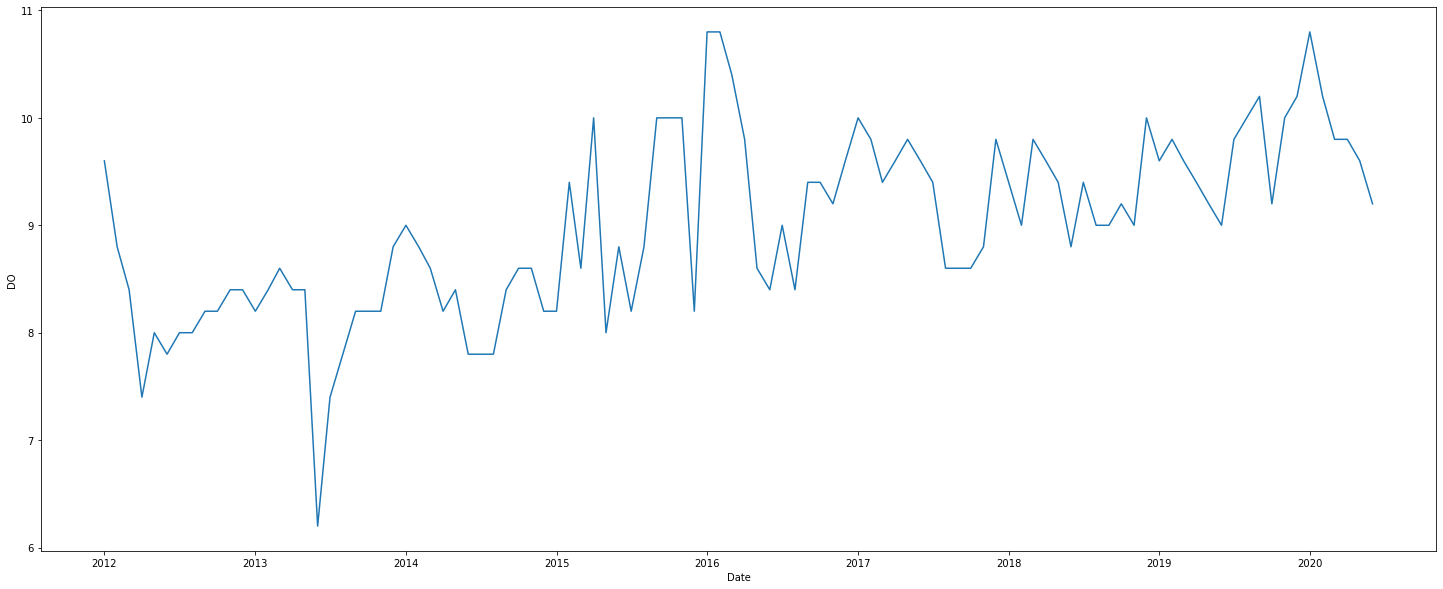

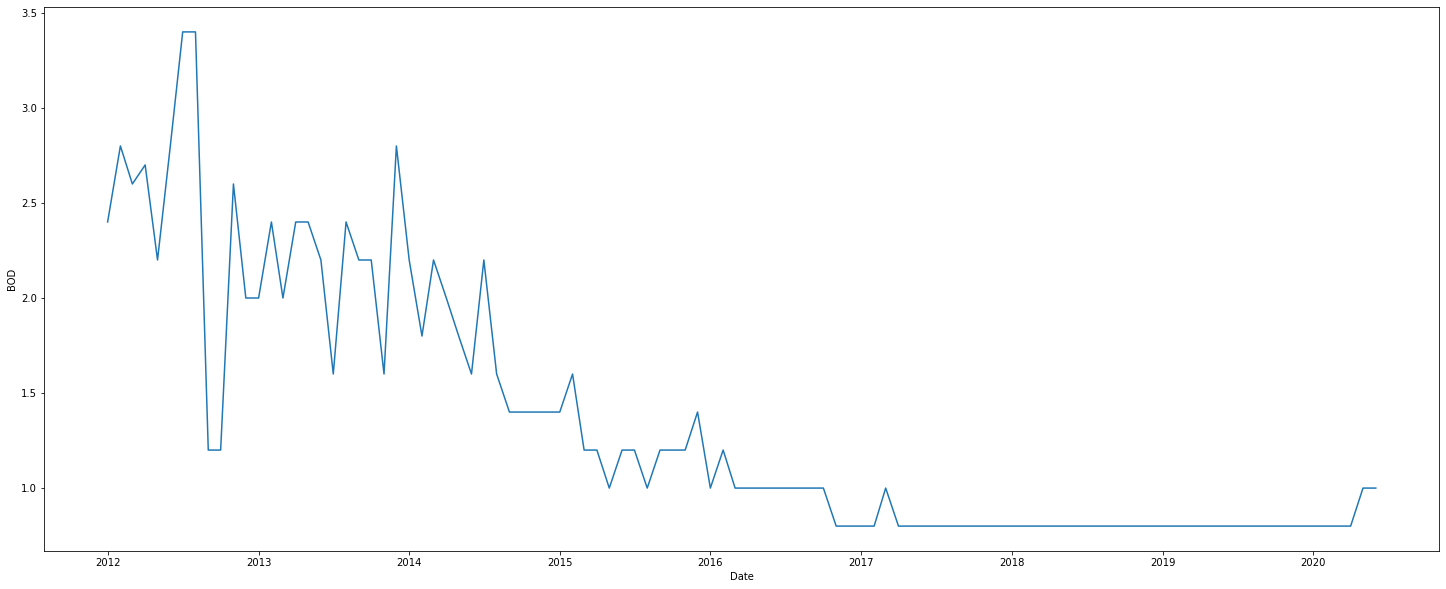

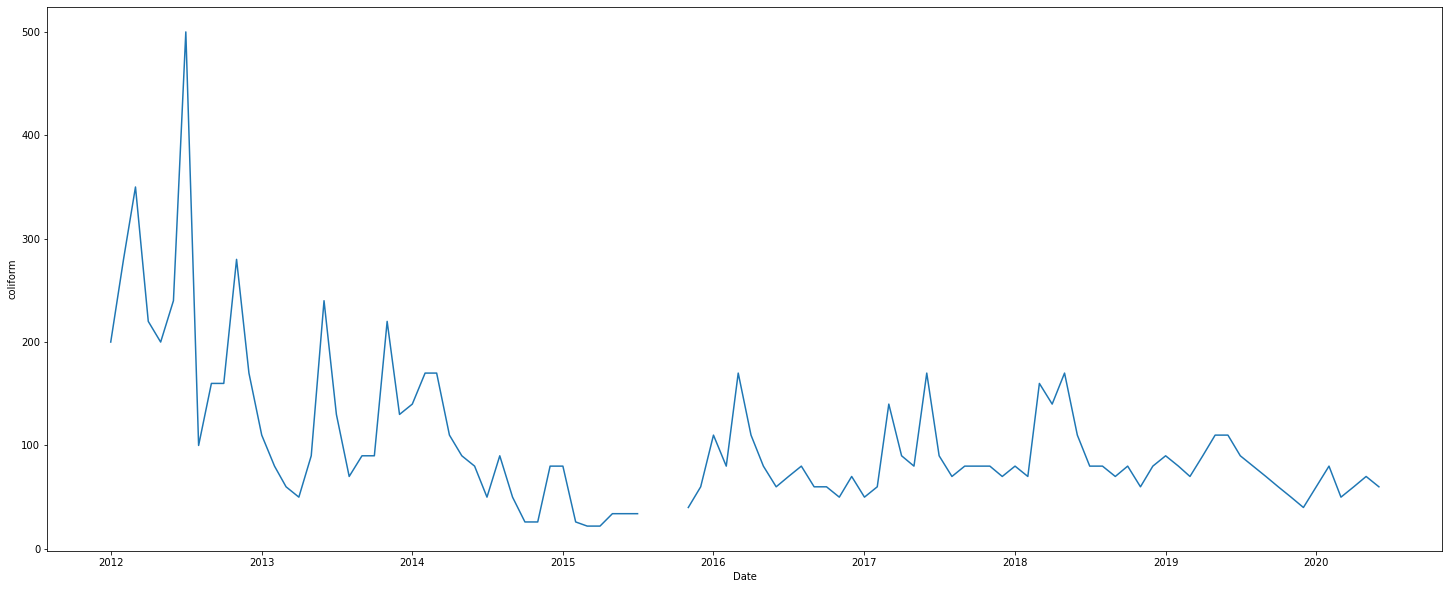

In [21]:
data.ffill(limit = 2, inplace= True)   #(LOCF)
for i in lis:
    plt.figure(figsize=(25, 10))
    plt.plot(data[i])
    plt.ylabel(i)
    plt.xlabel('Date')

In [22]:
data.isnull().sum()

temp        10
pH           0
DO           0
BOD          0
coliform     3
dtype: int64

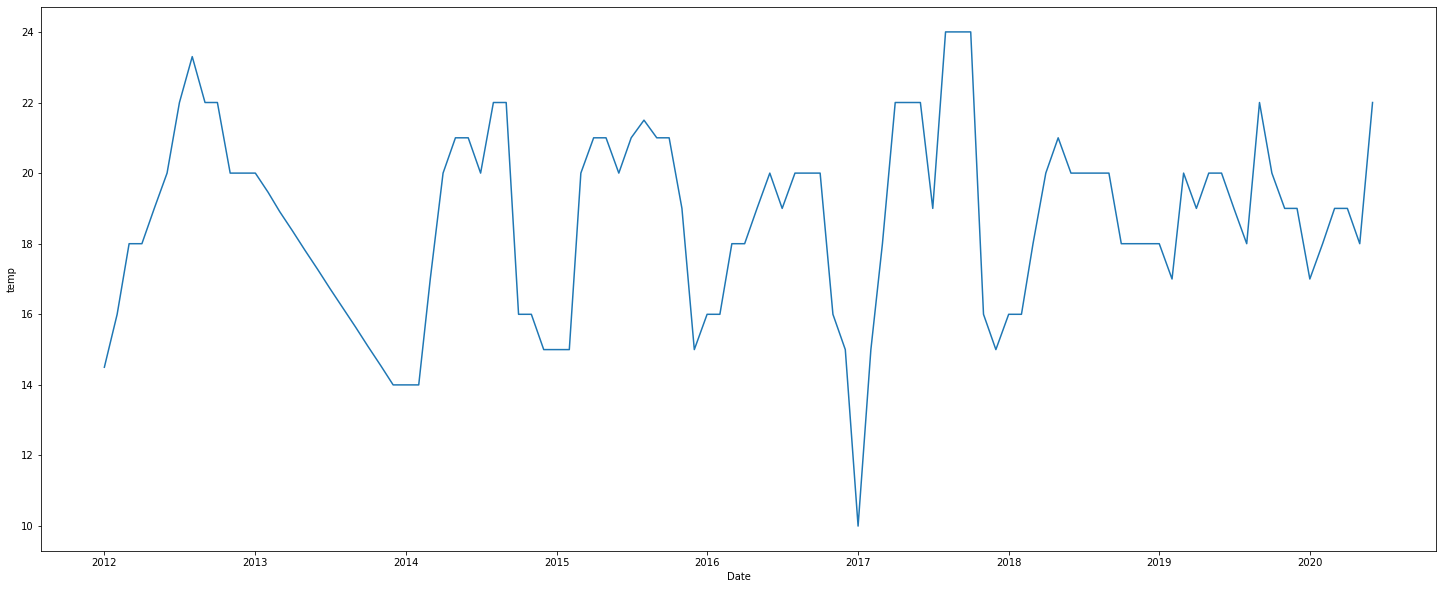

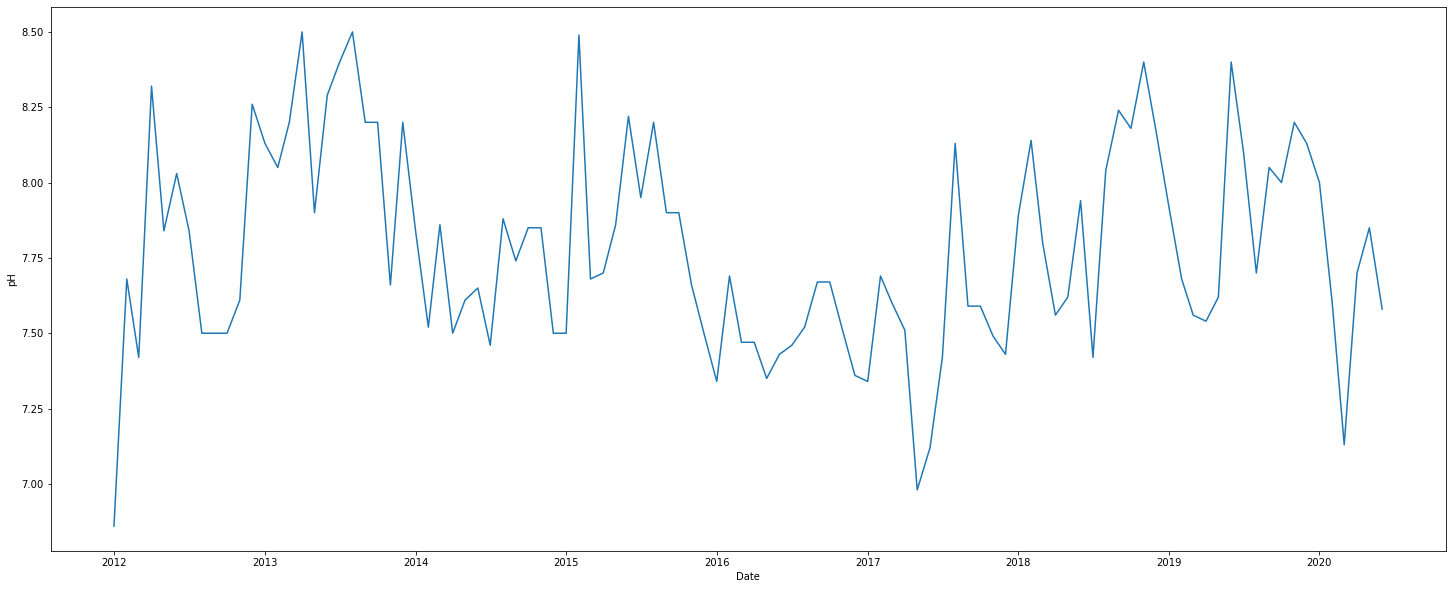

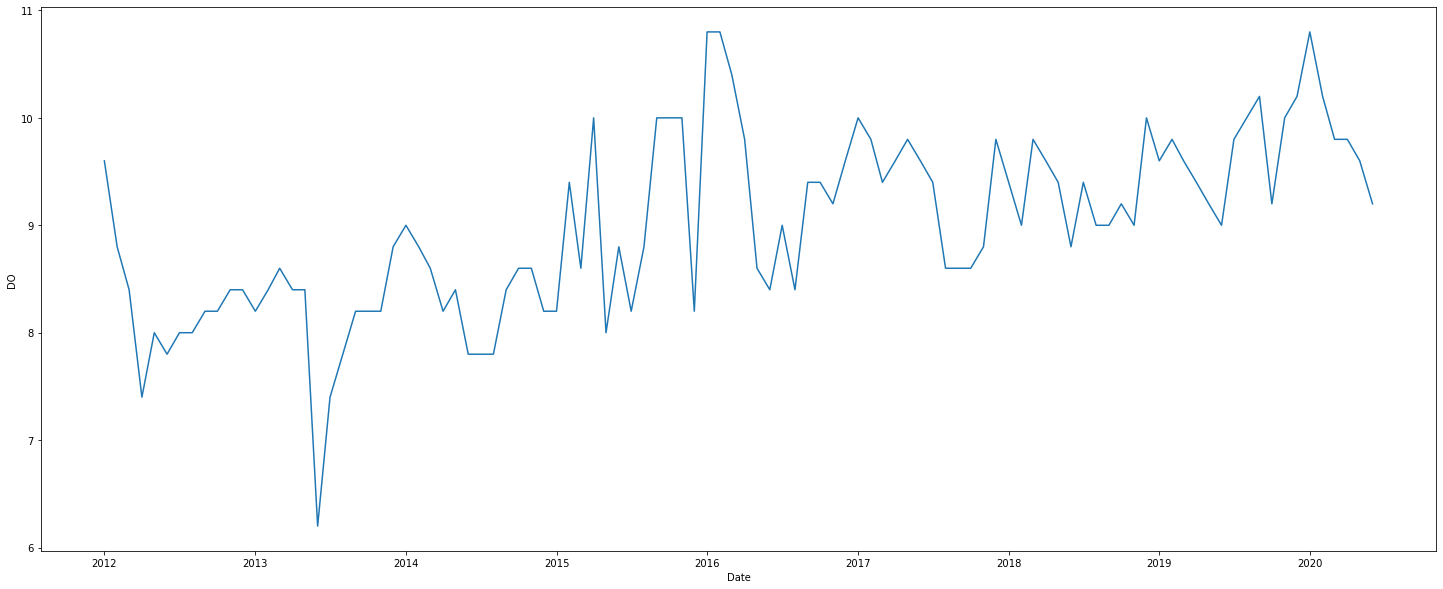

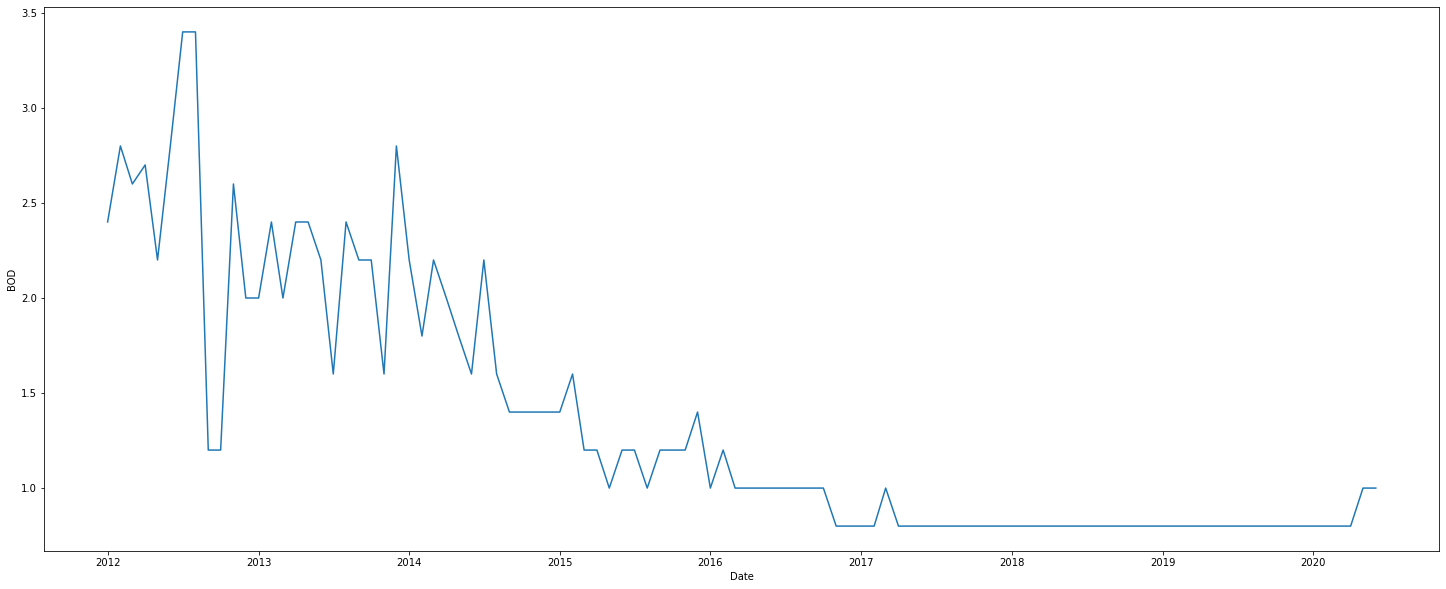

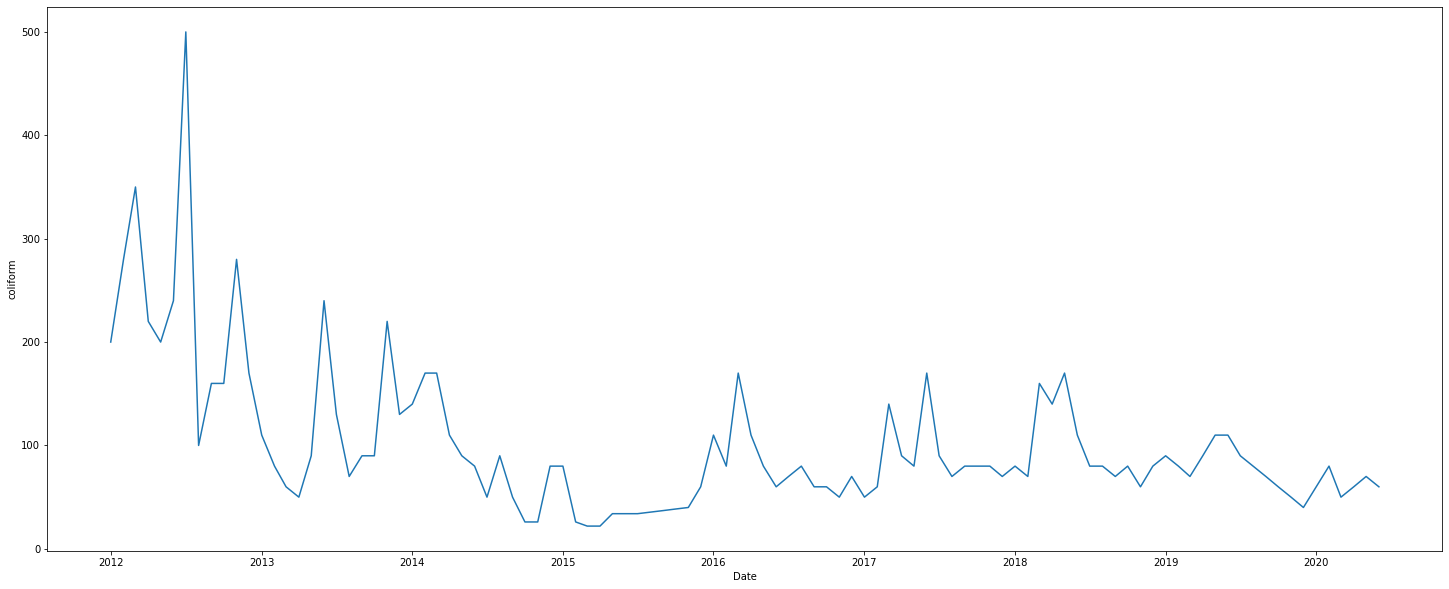

In [23]:
# Applying interpolation to left values 
data = data.interpolate(method='linear')
for i in lis:
    plt.figure(figsize=(25, 10))
    plt.plot(data[i])
    plt.ylabel(i)
    plt.xlabel('Date')

Finding correlation between features

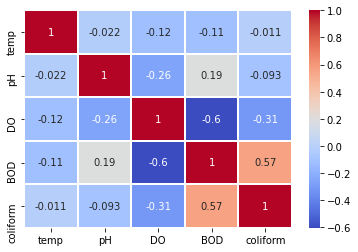

In [24]:
sns.heatmap(data.corr(),annot=True, linewidths=1 ,cmap= 'coolwarm')

Not very high correlation. BOD and coliform count slightly correlated as expected.

Stationarity tests on interpolated and LOCF data

- Dickey Fuller 

In [25]:
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(values):
    result=adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Time series has a unit root, indicating it is non-stationary ")

In [26]:
for i in lis:
    print(i)
    adfuller_test(data[i])

temp
ADF Test Statistic : -5.1220028200153305
p-value : 1.2658971153111362e-05
#Lags Used : 6
Number of Observations Used : 95
Reject the null hypothesis. Data has no unit root and is stationary
pH
ADF Test Statistic : -6.184647947649455
p-value : 6.332434137801655e-08
#Lags Used : 0
Number of Observations Used : 101
Reject the null hypothesis. Data has no unit root and is stationary
DO
ADF Test Statistic : -0.7391596006082386
p-value : 0.8363439616808066
#Lags Used : 11
Number of Observations Used : 90
Time series has a unit root, indicating it is non-stationary 
BOD
ADF Test Statistic : -1.3265821057456493
p-value : 0.6169249424797142
#Lags Used : 11
Number of Observations Used : 90
Time series has a unit root, indicating it is non-stationary 
coliform
ADF Test Statistic : -5.1502550376178355
p-value : 1.1098701331858304e-05
#Lags Used : 0
Number of Observations Used : 101
Reject the null hypothesis. Data has no unit root and is stationary


Time series corresponding to BOD and DO are highly non stationary

- KPSS test

In [27]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [28]:
for i in lis:
    print(i)
    kpss_test(data[i])

temp
Results of KPSS Test:
Test Statistic            0.144157
p-value                   0.100000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
pH
Results of KPSS Test:
Test Statistic            0.12126
p-value                   0.10000
Lags Used                13.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64
DO
Results of KPSS Test:
Test Statistic            0.678341
p-value                   0.015514
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
BOD
Results of KPSS Test:
Test Statistic            0.746927
p-value                   0.010000
Lags Used                13.000000
Critical Value (10%

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-valu

Gives same results as ADF test, however shows that coliform series is just stationary

In [29]:
#Checking tests for data imputed using temporal imputations 
for i in lis:
    print(i)
    adfuller_test(data_interpol[i])


temp
ADF Test Statistic : -3.1908124354072678
p-value : 0.020522689033408318
#Lags Used : 13
Number of Observations Used : 88
Reject the null hypothesis. Data has no unit root and is stationary
pH
ADF Test Statistic : -6.028039238708796
p-value : 1.4401186341957008e-07
#Lags Used : 0
Number of Observations Used : 101
Reject the null hypothesis. Data has no unit root and is stationary
DO
ADF Test Statistic : -0.69501516996273
p-value : 0.8480364994570898
#Lags Used : 11
Number of Observations Used : 90
Time series has a unit root, indicating it is non-stationary 
BOD
ADF Test Statistic : -2.056479426200866
p-value : 0.2623704732549881
#Lags Used : 10
Number of Observations Used : 91
Time series has a unit root, indicating it is non-stationary 
coliform
ADF Test Statistic : -4.063306389713602
p-value : 0.0011129889161364567
#Lags Used : 10
Number of Observations Used : 91
Reject the null hypothesis. Data has no unit root and is stationary


Same results. Using LOCF imputed data for further analysis

#### Autocorrelation plots and pacf plots

<Figure size 864x576 with 0 Axes>

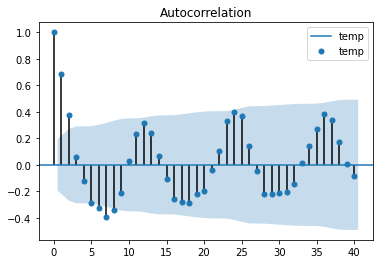

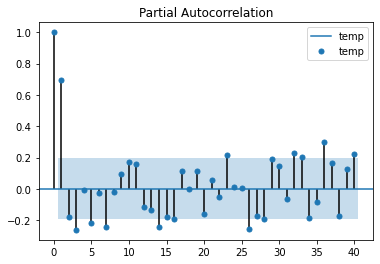

<Figure size 864x576 with 0 Axes>

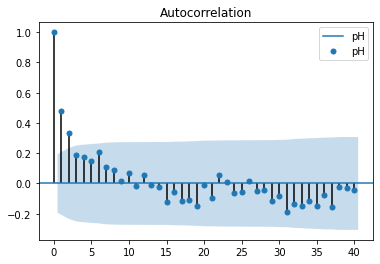

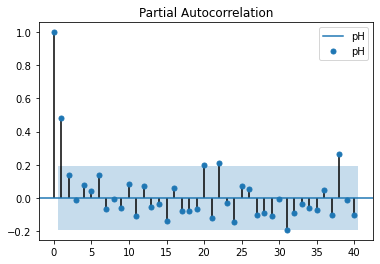

<Figure size 864x576 with 0 Axes>

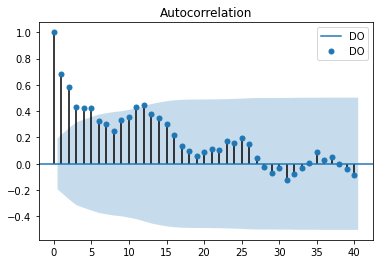

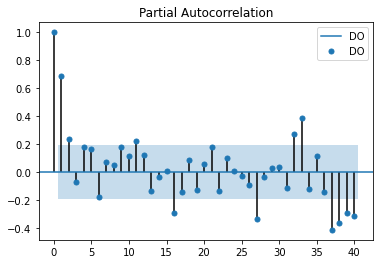

<Figure size 864x576 with 0 Axes>

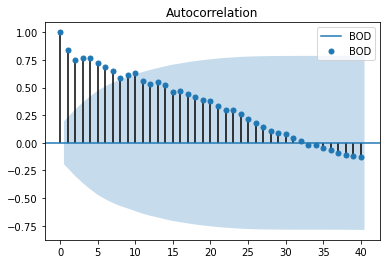

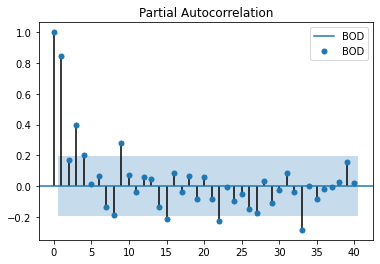

<Figure size 864x576 with 0 Axes>

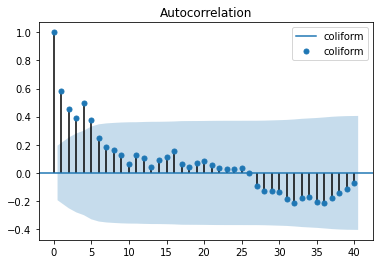

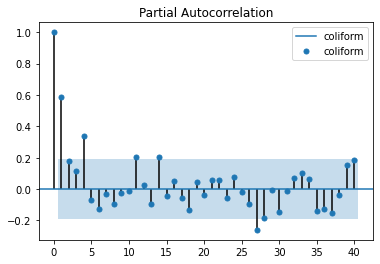

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
for i in lis:
    fig = plt.figure(figsize=(12,8))
    fig = plot_acf(data[i],lags=40, label = i)
    plt.legend(loc='best')
    fig = plot_pacf(data[i],lags=40, label = i)
    plt.legend(loc='best')

No obvious seasonality except in the case of temperature

#### Persistent model

In [31]:
from math import sqrt
def persistence(train, test , label):
    # walk-forward validation
    history = [x for x in train]
    predictions = list()
    for i in range(len(test)):
        # make prediction
        predictions.append(history[-1]) #persistence based on one day prior predictions
        # observation
        history.append(test[i])
     # line plot of observed vs predicted
    plt.plot(test, label = 'test')
    plt.plot(predictions , label = 'predictions')
    plt.title(label)
    plt.legend(loc = 'best')
    plt.show()
    # report performance
    rmse = sqrt(mean_squared_error(test, predictions))
    r2 = r2_score(test,predictions)
    print('RMSE: %.3f' % rmse)
    print('R2 score : %.3f' %r2)

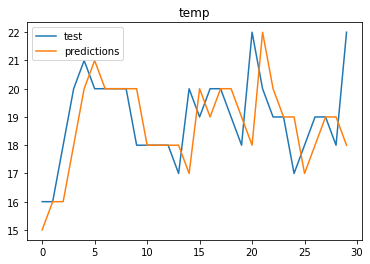

RMSE: 1.560
R2 score : -0.124


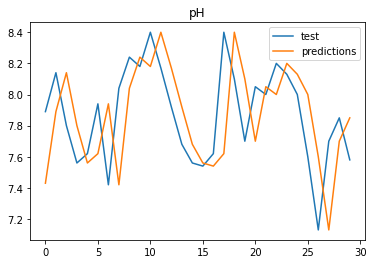

RMSE: 0.334
R2 score : -0.227


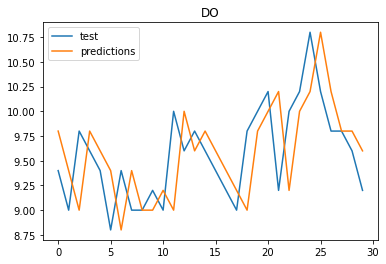

RMSE: 0.477
R2 score : -0.068


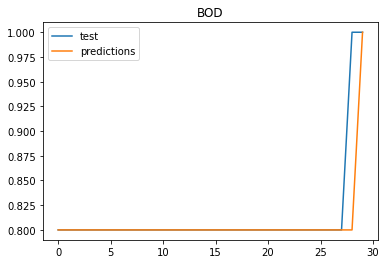

RMSE: 0.037
R2 score : 0.464


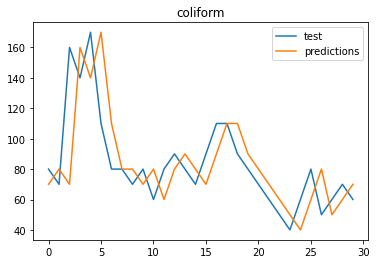

RMSE: 25.232
R2 score : 0.284


In [32]:
for i in lis:
    X = data[i].values
    train, test = X[:-30], X[-30:] #(70-30 split)
    persistence(train,test,i)

LSTM model

In [33]:
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [34]:
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
def scale(train, test):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [35]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

In [36]:
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

Test RMSE: 1.401
R2 score : 0.093


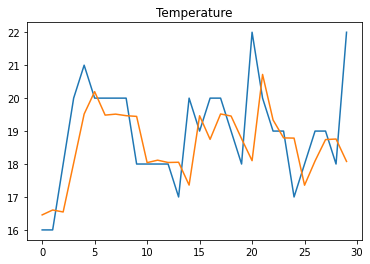

In [52]:
supervised = timeseries_to_supervised(data['temp'].values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-30], supervised_values[-30:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 80, 3)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # store forecast
    predictions.append(yhat)
    expected = data['temp'].values[len(train) + i ]
    #print('date=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(data['temp'].values[-30:], predictions))
print('Test RMSE: %.3f' % rmse)
r2 = r2_score(data['temp'].values[-30:],predictions)
print('R2 score : %.3f' %r2)
# line plot of observed vs predicted
plt.plot(data['temp'].values[-30:])
plt.plot(predictions)
plt.title('Temperature')
plt.show()

Considerable improvement from the persistence model